<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [38]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install openpyxl

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
# Drop rows where Employment is missing
df = df.dropna(subset=['Employment'])

# Fill JobSat missing values with the mode (most frequent value)
df['JobSat'] = df['JobSat'].fillna(df['JobSat'].mode()[0])

# Fill RemoteWork missing values with the mode
df['RemoteWork'] = df['RemoteWork'].fillna(df['RemoteWork'].mode()[0])

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


count    48704.000000
mean        10.739652
std          8.935175
min          1.000000
25%          4.000000
50%          8.000000
75%         15.000000
max         50.000000
Name: YearsCodePro, dtype: float64
ExperienceRange
0-5      8.0
5-10     8.0
10-20    8.0
>20      8.0
Name: JobSat, dtype: float64


/tmp/ipykernel_301/3706706282.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_jobsat = df.groupby('ExperienceRange')['JobSat'].median()


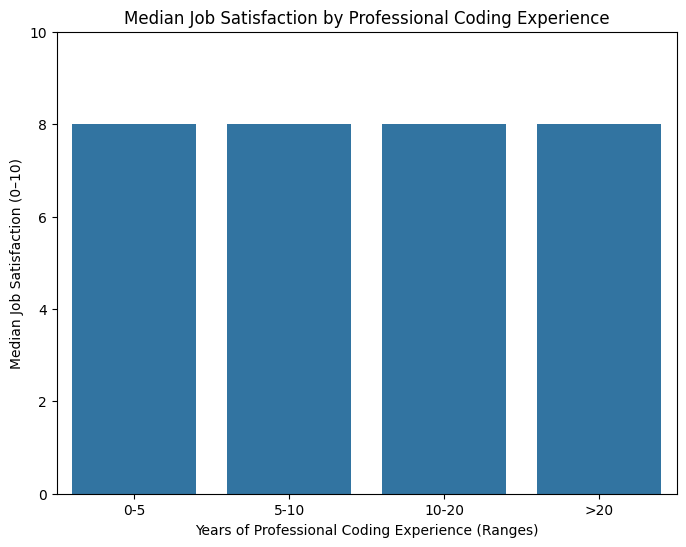

In [4]:
# Convert YearsCodePro to numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Quick summary
print(df['YearsCodePro'].describe())

bins = [0, 5, 10, 20, df['YearsCodePro'].max()]
labels = ['0-5', '5-10', '10-20', '>20']

df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

median_jobsat = df.groupby('ExperienceRange')['JobSat'].median()
print(median_jobsat)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.barplot(x=median_jobsat.index, y=median_jobsat.values)

plt.title("Median Job Satisfaction by Professional Coding Experience")
plt.xlabel("Years of Professional Coding Experience (Ranges)")
plt.ylabel("Median Job Satisfaction (0–10)")
plt.ylim(0,10)  # since satisfaction is 0–10 scale
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


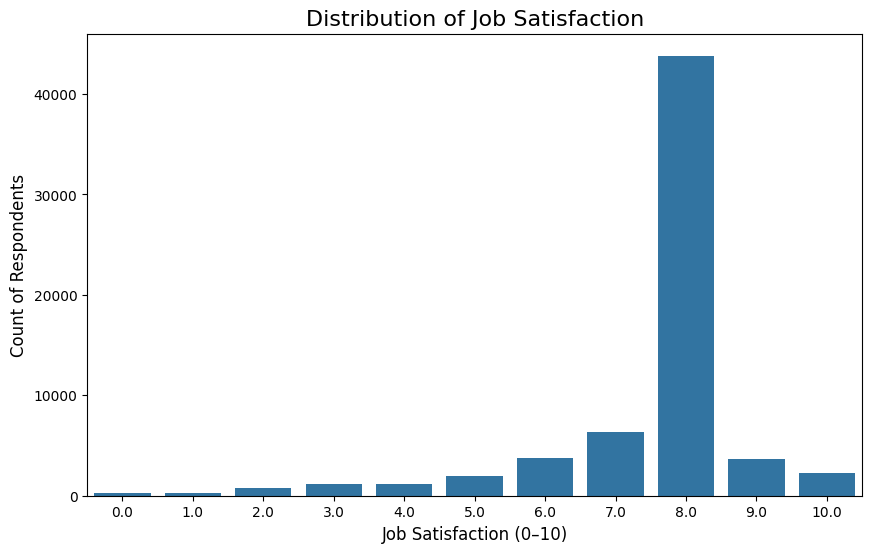

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(x='JobSat', data=df)

plt.title("Distribution of Job Satisfaction", fontsize=16)
plt.xlabel("Job Satisfaction (0–10)", fontsize=12)
plt.ylabel("Count of Respondents", fontsize=12)
plt.xticks(rotation=0)  # keep labels horizontal
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


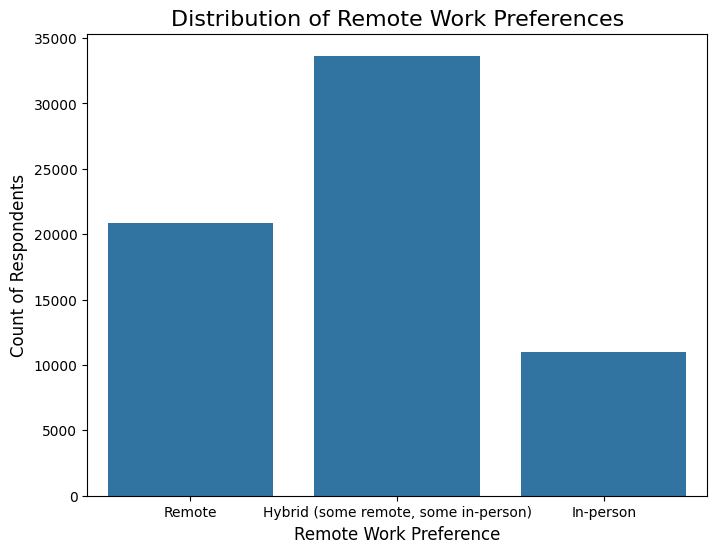

RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                                17296   
Employed, full-time;Employed, part-time                                               85   
Employed, full-time;Independent contractor, fre...                                  1330   
Employed, full-time;Independent contractor, fre...                                    80   
Employed, full-time;Independent contractor, fre...                                     0   
...                                                                                  ...   
Student, full-time;Student, part-time;Employed,...                                     4   
Student, full-time;Student, part-time;Retired                                          2   
Student, part-time                                                              

In [6]:
plt.figure(figsize=(8,6))
sns.countplot(x='RemoteWork', data=df)

plt.title("Distribution of Remote Work Preferences", fontsize=16)
plt.xlabel("Remote Work Preference", fontsize=12)
plt.ylabel("Count of Respondents", fontsize=12)
plt.show()

remote_emp_ct = pd.crosstab(df['Employment'], df['RemoteWork'])
print(remote_emp_ct)

# Normalize by row to see percentages
remote_emp_pct = pd.crosstab(df['Employment'], df['RemoteWork'], normalize='index') * 100
print(remote_emp_pct.round(2))

remote_role_ct = pd.crosstab(df['DevType'], df['RemoteWork'])
print(remote_role_ct)

# Percentages
remote_role_pct = pd.crosstab(df['DevType'], df['RemoteWork'], normalize='index') * 100
print(remote_role_pct.round(2))

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


                  Language  Count
0               JavaScript   6849
1                   Python   6238
2                      SQL   5766
3                 HTML/CSS   5754
4  Bash/Shell (all shells)   4776
5               TypeScript   4173
6                       C#   3112
7                     Java   2949
8                      C++   2607
9                        C   2225


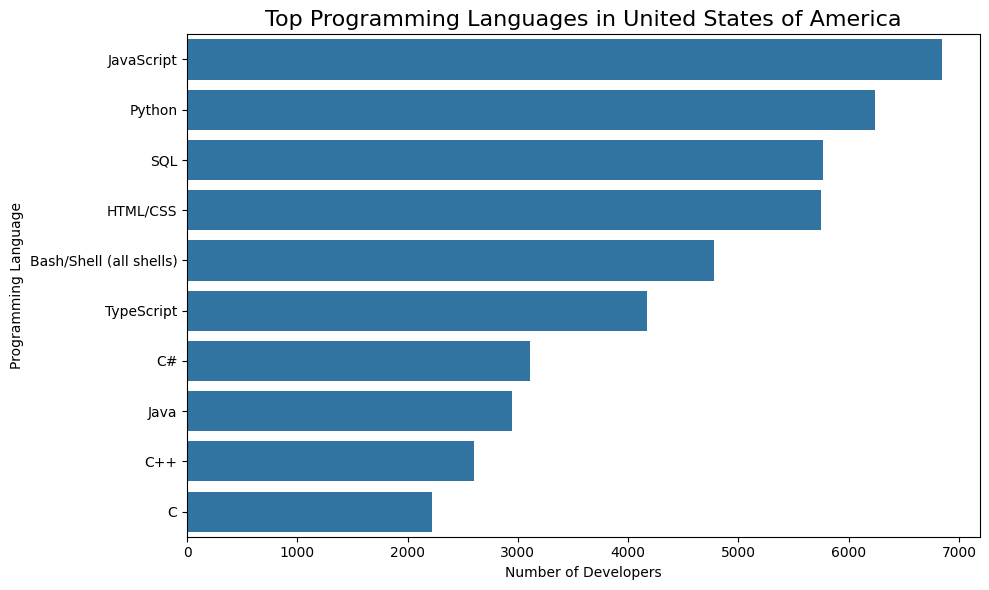

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

country = "United States of America"   # <-- replace with the exact label from the debug print

# Clean + explode just for the chosen country
tmp = df.loc[df['Country'].notna() & df['LanguageHaveWorkedWith'].notna()].copy()
tmp['Country'] = tmp['Country'].str.strip()
tmp = tmp[tmp['Country'] == country]

# If your data uses different separators, you can widen the split: r';|\|'
tmp = tmp.assign(Language=tmp['LanguageHaveWorkedWith'].str.split(';')).explode('Language')
tmp['Language'] = tmp['Language'].str.strip()
tmp = tmp[tmp['Language'].ne('')]

# Top 10 languages in this country
subset = (tmp.groupby('Language')
            .size()
            .sort_values(ascending=False)
            .head(10)
            .reset_index(name='Count'))

print(subset)  # sanity check it’s not empty

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=subset, x='Count', y='Language')
plt.title(f"Top Programming Languages in {country}", fontsize=16)
plt.xlabel("Number of Developers")
plt.ylabel("Programming Language")
plt.tight_layout()
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


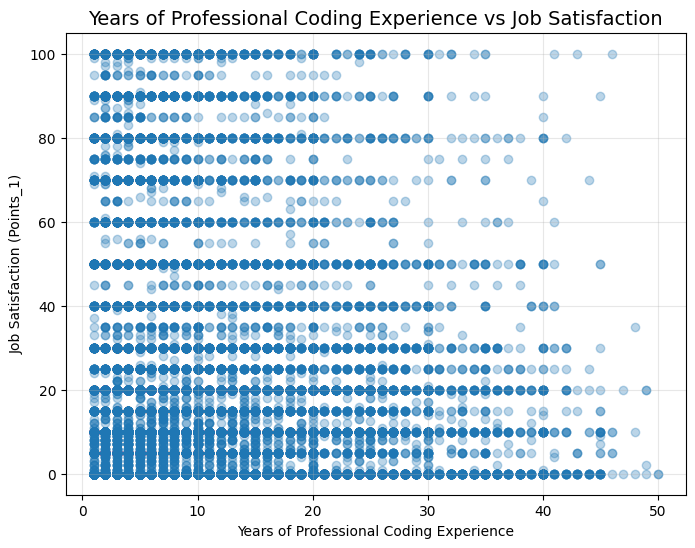

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Make a copy
df_scatter = df[['YearsCodePro', 'JobSatPoints_1']].copy()

# Convert YearsCodePro to numeric
df_scatter['YearsCodePro'] = df_scatter['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51
})
df_scatter['YearsCodePro'] = pd.to_numeric(df_scatter['YearsCodePro'], errors='coerce')

# Drop missing values
df_scatter = df_scatter.dropna()

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(df_scatter['YearsCodePro'], df_scatter['JobSatPoints_1'], alpha=0.3)

plt.title("Years of Professional Coding Experience vs Job Satisfaction", fontsize=14)
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Job Satisfaction (Points_1)")
plt.grid(True, alpha=0.3)
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


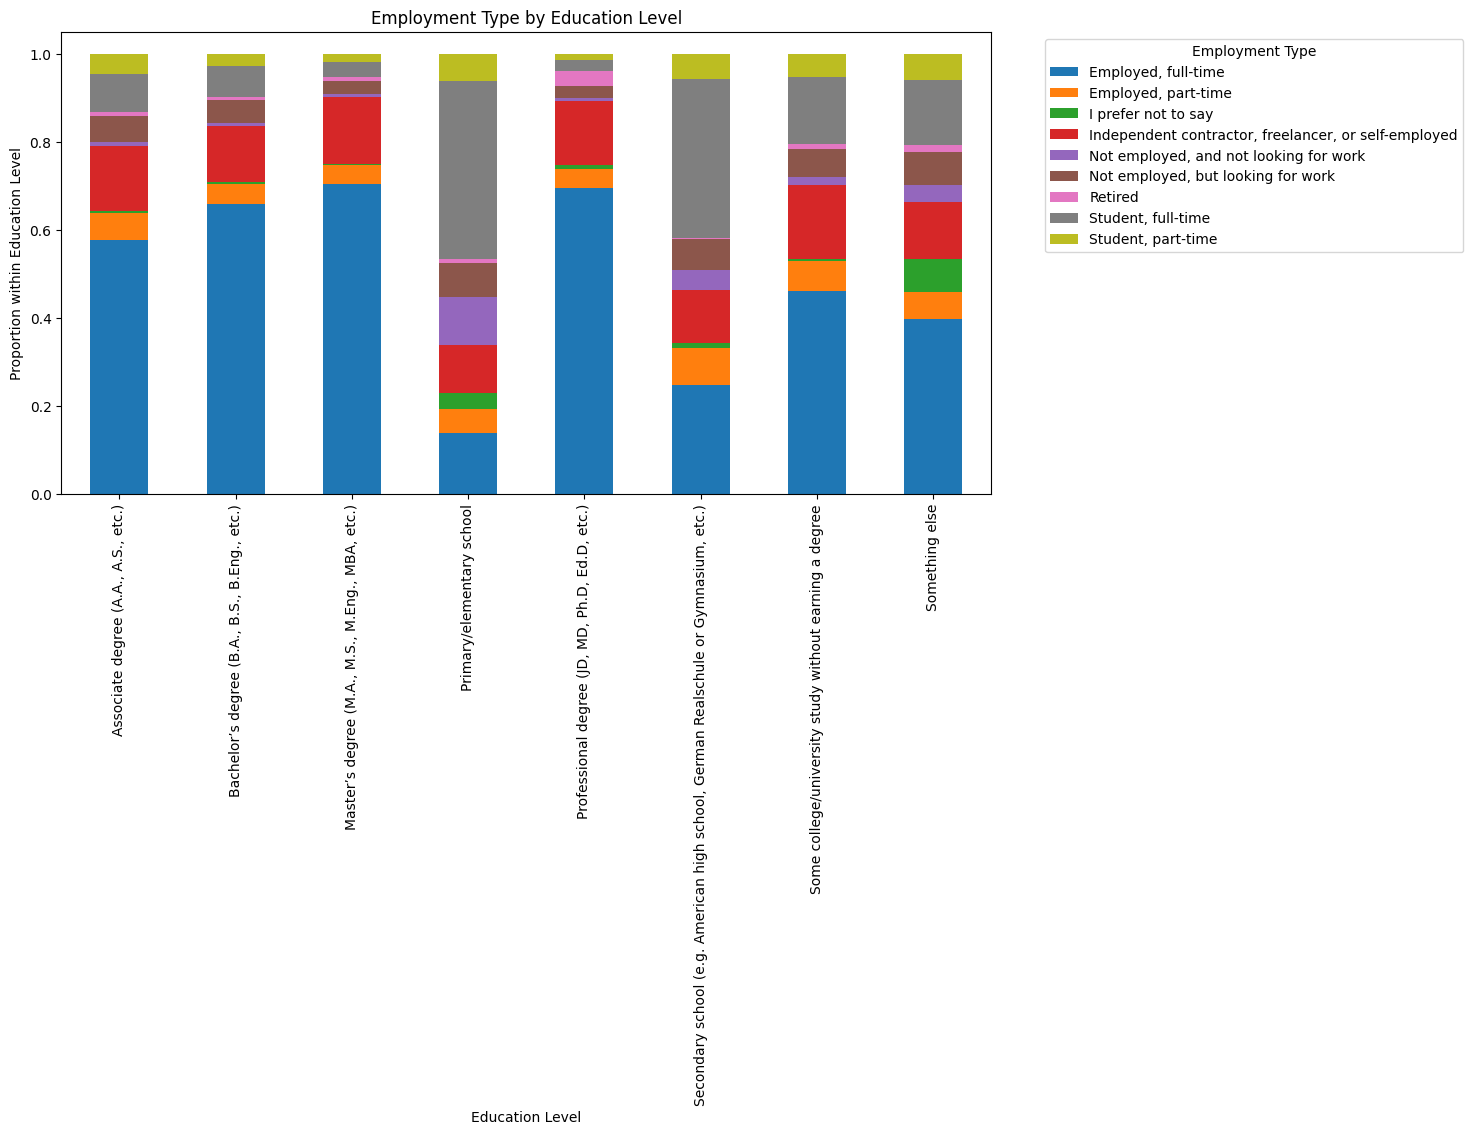

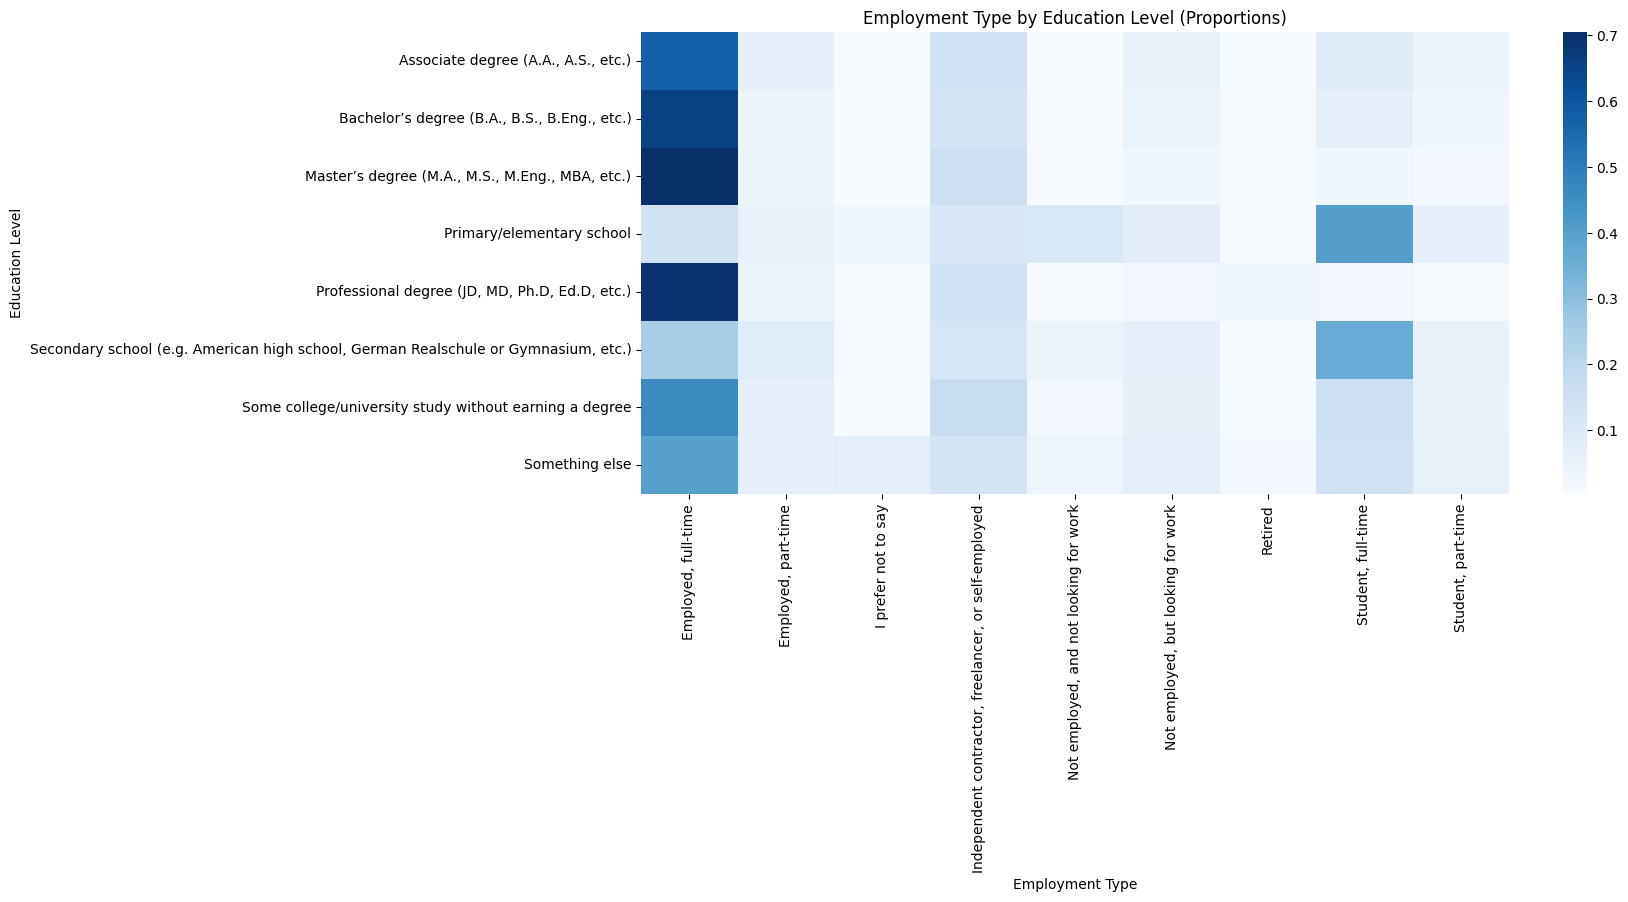

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Split multiple employment types into rows
tmp = df.dropna(subset=['EdLevel', 'Employment']).copy()
tmp = tmp.assign(Employment=tmp['Employment'].str.split(';')).explode('Employment')
tmp['Employment'] = tmp['Employment'].str.strip()

# Step 2: Cross-tab (now with cleaner categories)
crosstab = pd.crosstab(tmp['EdLevel'], tmp['Employment'], normalize='index')

# ---- Option A: Stacked bar ----
crosstab.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Employment Type by Education Level")
plt.ylabel("Proportion within Education Level")
plt.xlabel("Education Level")
plt.legend(title="Employment Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# ---- Option B: Heatmap ----
plt.figure(figsize=(14,6))
sns.heatmap(crosstab, cmap="Blues", annot=False, cbar=True)
plt.title("Employment Type by Education Level (Proportions)")
plt.ylabel("Education Level")
plt.xlabel("Employment Type")
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [ ]:
# Example: assume 'df' is your cleaned dataset

# Save to CSV
df.to_csv("modified_dataset.csv", index=False)

# Save to Excel
df.to_excel("modified_dataset.xlsx", index=False)

# Save to Pickle (fast loading in pandas)
df.to_pickle("modified_dataset.pkl")

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
